# 04 Noise Generation

In this notebook, we talk about how to generate noise. We will cover multiple types of noise as they are added.

In [228]:
from ananke.configurations.presets.detector import single_line_configuration
from ananke.schemas.event import NoiseType
from ananke.services.detector import DetectorBuilderService
from olympus.configuration.generators import NoiseGeneratorConfiguration, BioluminescenceGeneratorConfiguration
from ananke.configurations.collection import HDF5StorageConfiguration
from olympus.event_generation.generators import generate
from olympus.configuration.generators import (
    DatasetConfiguration,
    GenerationConfiguration,
)

Let's get our detector

In [5]:
detector_service = DetectorBuilderService()
det = detector_service.get(configuration=single_line_configuration)

## Electrical Noise Generation

In [227]:


noise_generator_config = NoiseGeneratorConfiguration(
    type=NoiseType.ELECTRICAL,
    start_time=0,
    duration=1000,
)

dataset_configuration = DatasetConfiguration(
    detector=single_line_configuration,
    generators=[
        GenerationConfiguration(
            generator=noise_generator_config,
            number_of_samples=2000
        ),
    ],
    storage=HDF5StorageConfiguration(data_path='data/electrical_noise.h5', read_only=False)
)

electrical_collection = generate(dataset_configuration)

AttributeError: 'Collection' object has no attribute 'get_records'

In [230]:
with electrical_collection:
    records = electrical_collection.storage.get_records()
    hits = electrical_collection.storage.get_hits()
    first_record_hits = electrical_collection.storage.get_hits(record_ids=0)
    second_record_hits = electrical_collection.storage.get_hits(record_ids=1)
    detector = electrical_collection.storage.get_detector()
records.df.head()
hits.df

,time,pmt_id,record_id,string_id,module_id,type
0,508.717579,0,2,0,0,20
1,426.477265,0,2,0,0,20
2,44.704587,0,3,0,0,20
3,101.968928,0,18,0,0,20
4,243.134204,0,25,0,0,20
...,...,...,...,...,...,...
102560,445.624571,15,1967,0,19,20
102561,332.751608,15,1980,0,19,20
102562,154.358985,15,1981,0,19,20
102563,139.519341,15,1987,0,19,20


In [223]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def draw_bars(dataframe):
    counts, bins = np.histogram(dataframe['time'],bins=50, range=(0,1000))
    fig, ax = plt.subplots()
    ax.stairs(counts, bins, fill=True)
    ax.set_xlabel('Time [ns]')
    ax.set_ylabel('Hit count')
    return fig

def draw_histogram(dataframe, colorbar_step=4):
    grouped_dataframe = dataframe.groupby(['string_id', 'module_id', 'pmt_id']).agg(list)[['time']]
    for row in detector.indices.itertuples():
        current_index_tuple = (row.string_id, row.module_id, row.pmt_id)
        try:
            grouped_dataframe.loc[current_index_tuple]
        except:
            grouped_dataframe.at[current_index_tuple, :] = [-1]
            
    grouped_dataframe = grouped_dataframe.sort_index()
    
    histrograms = grouped_dataframe['time'].map(lambda x: np.histogram(x, bins=50, range=(0,1000))[0] if x != -1 else np.zeros(50)).reset_index()['time']
    stacked_histograms = np.stack(histrograms)
    print(np.max(stacked_histograms))
    fig, ax = plt.subplots()
    c = ax.pcolormesh(stacked_histograms)
    ax.set_xticklabels(np.arange(6)*200)
    ax.set_xlabel('Time [ns]')
    ax.set_ylabel('PMT Number')
    fig.colorbar(c, ax=ax, ticks=range(0,int(np.ceil(np.max(stacked_histograms))),colorbar_step), label='Hit count')
    return fig



/tmp/ipykernel_11431/3149252686.py:4: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



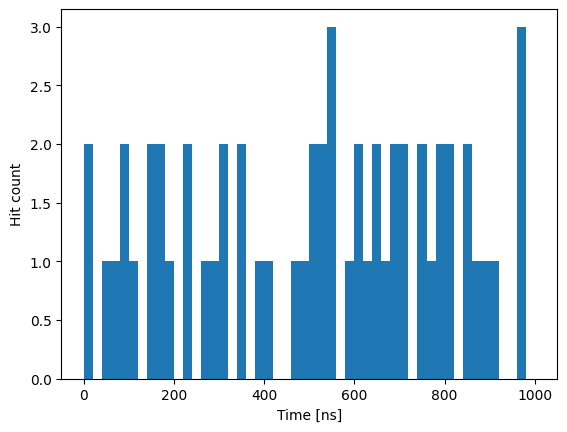

In [224]:
fig = draw_bars(first_record_hits.df)
fig.savefig('data/electrical_first_record_hist.png', dpi=300)
fig.show()

/tmp/ipykernel_11431/3929172774.py:3: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



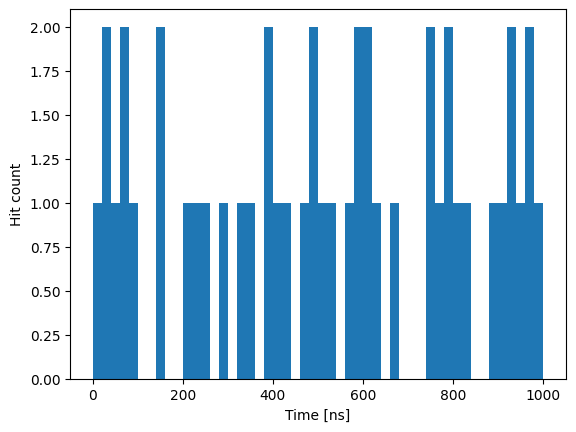

In [226]:
fig = draw_bars(second_record_hits.df)
fig.savefig('data/electrical_second_record_hist.png', dpi=300)
fig.show()

/tmp/ipykernel_11431/1009125833.py:3: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



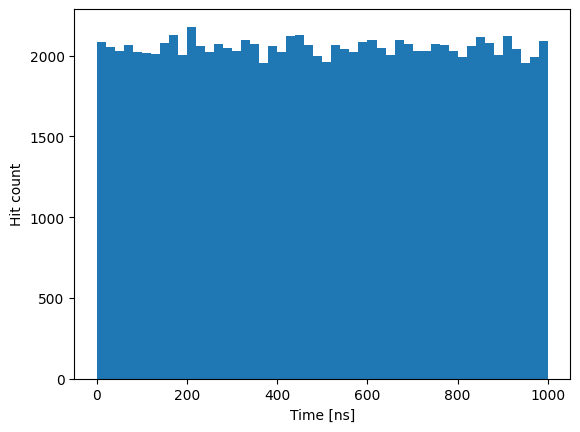

In [225]:
fig = draw_bars(hits.df)
fig.savefig('data/electrical_all_records_hist.png', dpi=300)
fig.show()

1.0


/tmp/ipykernel_11431/39228784.py:33: UserWarning:

FixedFormatter should only be used together with FixedLocator



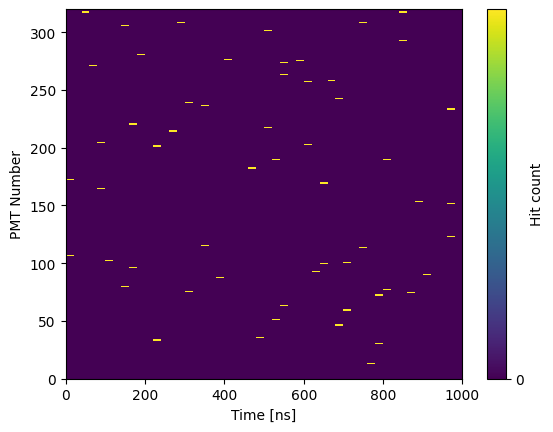

In [221]:
fig = draw_histogram(first_record_hits.df, colorbar_step=1)
fig.savefig('data/electrical_first_record_pmt.png', dpi=300)
plt.show()

1.0


/tmp/ipykernel_11431/39228784.py:33: UserWarning:

FixedFormatter should only be used together with FixedLocator



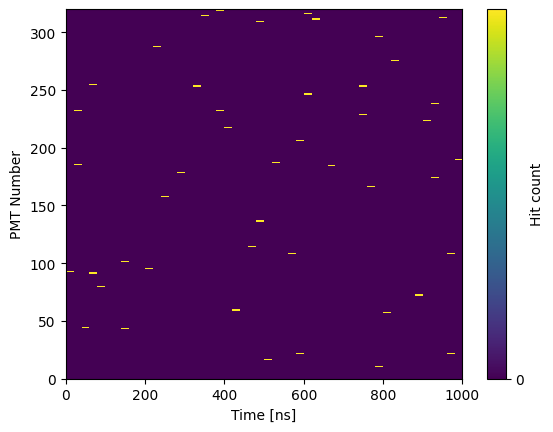

In [214]:
fig = draw_histogram(second_record_hits.df)
fig.savefig('data/electrical_second_record_pmt.png', dpi=300)
plt.show()

19


/tmp/ipykernel_11431/39228784.py:33: UserWarning:

FixedFormatter should only be used together with FixedLocator



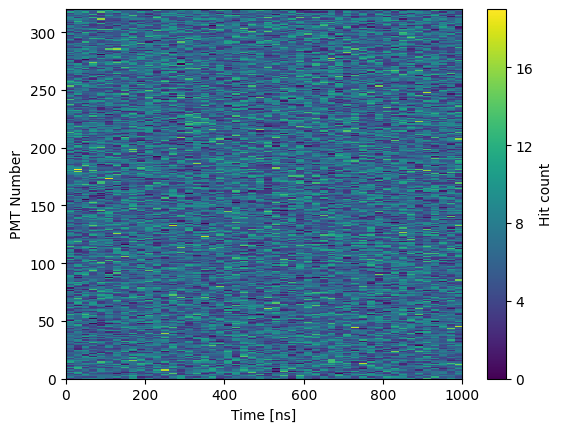

In [213]:
fig = draw_histogram(hits.df)
fig.savefig('data/electrical_all_records_pmt.png', dpi=300)
plt.show()

## Bioluminescense Generation

In [235]:


bioluminescense_generator_config = BioluminescenceGeneratorConfiguration(
    type=NoiseType.BIOLUMINESCENCE,
    start_time=0,
    duration=1000,
    julia_data_path='../../data/biolumi_sims',
    batch_size= 48
)

dataset_configuration = DatasetConfiguration(
    detector=single_line_configuration,
    generators=[
        GenerationConfiguration(
            generator=bioluminescense_generator_config,
            number_of_samples=2000
        ),
    ],
    storage=HDF5StorageConfiguration(data_path='data/bioluminescense.h5', read_only=False)
)

bioluminescense_collection = generate(dataset_configuration)

/home/janik/projects/master/olympus/olympus/event_generation/generators.py:465: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [04:06<00:00,  5.88s/it]
/home/janik/projects/master/olympus/olympus/event_generation/generators.py:465: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

100%|████████████████████████████████████████████████████████

In [240]:
with bioluminescense_collection:
    records = bioluminescense_collection.storage.get_records()
    hits = bioluminescense_collection.storage.get_hits()
    first_record_hits = bioluminescense_collection.storage.get_hits(record_ids=10)
    second_record_hits = bioluminescense_collection.storage.get_hits(record_ids=1)
    detector = bioluminescense_collection.storage.get_detector()
records.df

,record_id,time,duration,type,location_x,location_y,location_z,orientation_x,orientation_y,orientation_z,energy,particle_id,length
0,0,0.0,1000.0,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN
1,1,0.0,1000.0,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN
2,2,0.0,1000.0,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN
3,3,0.0,1000.0,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN
4,4,0.0,1000.0,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,2044,0.0,1000.0,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN
45,2045,0.0,1000.0,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN
46,2046,0.0,1000.0,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN
47,2047,0.0,1000.0,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN


/tmp/ipykernel_11431/2915337844.py:3: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



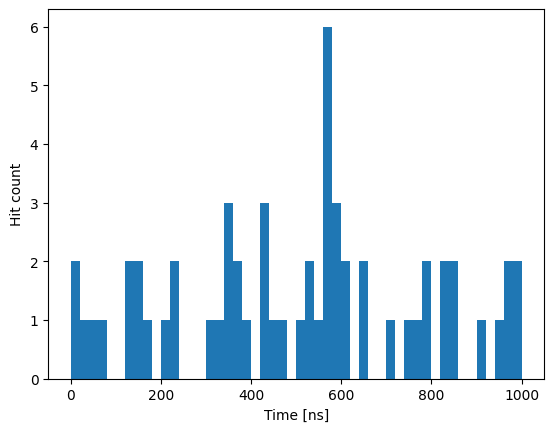

In [241]:
fig = draw_bars(first_record_hits.df)
fig.savefig('data/bioluminescense_first_record_hist.png', dpi=300)
fig.show()

/tmp/ipykernel_11431/3969874494.py:3: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



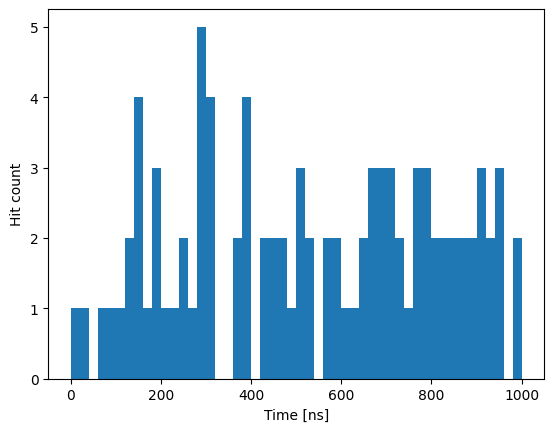

In [242]:
fig = draw_bars(second_record_hits.df)
fig.savefig('data/bioluminescense_second_record_hist.png', dpi=300)
fig.show()

/tmp/ipykernel_11431/4134023569.py:3: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



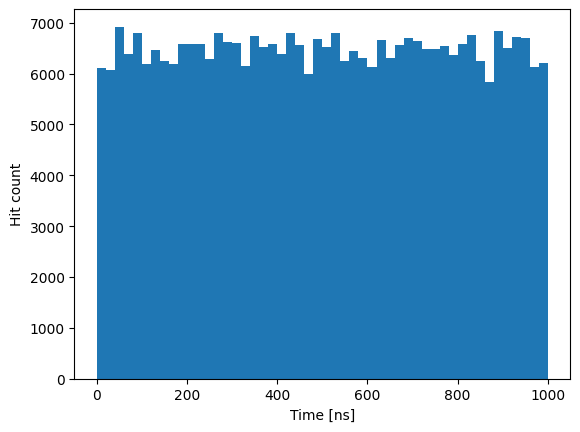

In [243]:
fig = draw_bars(hits.df)
fig.savefig('data/bioluminescense_all_records_hist.png', dpi=300)
fig.show()

2.0


/tmp/ipykernel_11431/190794674.py:29: UserWarning:

FixedFormatter should only be used together with FixedLocator



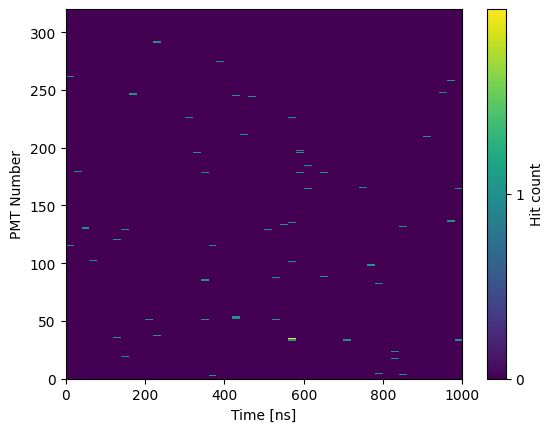

In [244]:
fig = draw_histogram(first_record_hits.df, colorbar_step=1)
fig.savefig('data/bioluminescense_first_record_pmt.png', dpi=300)
plt.show()

2.0


/tmp/ipykernel_11431/190794674.py:29: UserWarning:

FixedFormatter should only be used together with FixedLocator



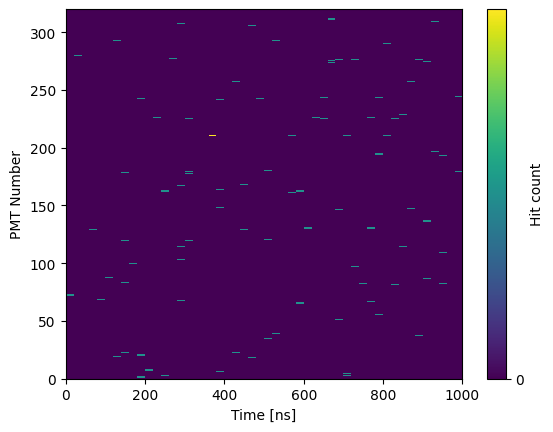

In [245]:
fig = draw_histogram(second_record_hits.df)
fig.savefig('data/bioluminescense_second_record_pmt.png', dpi=300)
plt.show()

134.0


/tmp/ipykernel_11431/190794674.py:29: UserWarning:

FixedFormatter should only be used together with FixedLocator



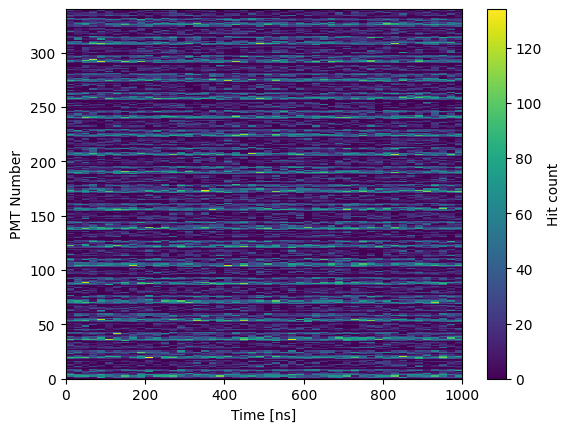

In [247]:
fig = draw_histogram(hits.df, colorbar_step=20)
fig.savefig('data/bioluminescence_all_records_pmt.png', dpi=300)
plt.show()